In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('fifa21_male2.csv')
df.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [4]:
df.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [5]:
new_columns = []
for item in df.columns:
    item = item.lower()
    item = item.replace(' ', '_')
    new_columns.append(item)

In [6]:
df.shape

(17125, 107)

In [7]:
df.columns = new_columns
df.head()

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [8]:
data = df.drop(['id','name','nationality', 'club', 'position', 'player_photo', 'club_logo', 'flag_photo', 'team_&_contract', 'joined','loan_date_end', 'release_clause', 'contract','w/f','sm','ir','gender', 'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk', 'composure', 'value','wage', 'pot', 'crossing', 'finishing','heading_accuracy','short_passing', 'volleys','dribbling','curve','fk_accuracy','long_passing','ball_control','acceleration','sprint_speed','agility','reactions','balance','shot_power','jumping','stamina','strength','long_shots','aggression','interceptions','positioning','vision','penalties','marking','standing_tackle','sliding_tackle','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_positioning','total_stats','growth'], axis =1)

In [9]:
data.shape

(17125, 24)

In [10]:
data.head(100)

,age,ova,bov,bp,height,weight,foot,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits
0,33,69,71,LWB,"6'0""",181lbs,Left,313,338,347,347,320,208,56,408,Medium,High,71,59,70,71,68,69,4
1,37,71,70,CM,"5'10""",143lbs,Right,337,369,305,324,362,153,56,385,Medium,Medium,53,69,73,69,58,63,4
2,33,71,71,CAM,"5'9""",161lbs,Right,337,387,295,284,317,99,51,354,Medium,Low,45,68,76,77,36,52,11
3,36,68,70,ST,"5'11""",165lbs,Right,264,255,176,239,271,75,68,369,NaN,NaN,61,66,66,69,47,60,3
4,36,81,82,CAM,"5'7""",150lbs,Right,367,408,346,297,370,181,45,420,High,Medium,58,70,85,85,63,59,149
5,27,66,66,RW,"5'8""",163lbs,Right,271,276,406,315,256,79,46,360,Medium,Medium,91,56,56,67,27,63,7
6,38,77,77,CM,"5'7""",159lbs,Left,342,406,308,340,384,190,47,403,Medium,Medium,44,71,83,77,62,66,7
7,39,78,78,CAM,"5'10""",157lbs,Left,380,402,337,310,358,120,32,392,Medium,Medium,60,72,85,77,41,57,9
8,35,76,78,CB,"5'10""",174lbs,Right,304,258,324,284,319,242,43,378,NaN,NaN,67,36,67,53,81,74,4
9,37,80,82,CAM,"5'7""",157lbs,Right,394,393,338,333,417,143,47,415,Medium,Medium,53,76,87,79,59,61,7


In [11]:
data.dtypes

age             int64
ova             int64
bov             int64
bp             object
height         object
weight         object
foot           object
attacking       int64
skill           int64
movement        int64
power           int64
mentality       int64
defending       int64
goalkeeping     int64
base_stats      int64
a/w            object
d/w            object
pac             int64
sho             int64
pas             int64
dri             int64
def             int64
phy             int64
hits           object
dtype: object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          17125 non-null  int64 
 1   ova          17125 non-null  int64 
 2   bov          17125 non-null  int64 
 3   bp           17125 non-null  object
 4   height       17125 non-null  object
 5   weight       17125 non-null  object
 6   foot         17125 non-null  object
 7   attacking    17125 non-null  int64 
 8   skill        17125 non-null  int64 
 9   movement     17125 non-null  int64 
 10  power        17125 non-null  int64 
 11  mentality    17125 non-null  int64 
 12  defending    17125 non-null  int64 
 13  goalkeeping  17125 non-null  int64 
 14  base_stats   17125 non-null  int64 
 15  a/w          17036 non-null  object
 16  d/w          17036 non-null  object
 17  pac          17125 non-null  int64 
 18  sho          17125 non-null  int64 
 19  pas          17125 non-nu

In [13]:
data['age'] = data['age'].astype('object')

In [14]:
np.sort(list(data['hits'].unique()))

array(['1.1K', '1.2K', '1.3K', '1.4K', '1.5K', '1.6K', '1.7K', '1.8K',
       '1.9K', '10', '10', '100', '101', '102', '103', '104', '105',
       '106', '107', '108', '109', '11', '11', '110', '111', '111', '112',
       '113', '114', '115', '116', '117', '117', '118', '119', '12', '12',
       '120', '121', '122', '123', '123', '124', '125', '127', '127',
       '128', '129', '13', '13', '130', '131', '132', '133', '134', '135',
       '136', '137', '138', '139', '14', '14', '140', '141', '142', '143',
       '144', '145', '146', '147', '148', '149', '15', '15', '150', '150',
       '151', '151', '152', '153', '154', '155', '156', '157', '158',
       '159', '16', '16', '160', '161', '162', '162', '163', '164', '165',
       '165', '166', '167', '168', '169', '17', '17', '170', '171', '172',
       '173', '174', '175', '176', '177', '178', '179', '18', '18', '180',
       '181', '182', '183', '184', '185', '186', '187', '188', '189',
       '19', '19', '190', '191', '192', '193', '19

In [15]:
def clean_hits(x):
    x = str(x)
    if x[-1:] == 'K':
        return int(x.replace('.','').replace('K','00'))
    else:
        return int(x)

In [16]:
int('9.2K'.replace('.','').replace('K','00'))

9200

In [17]:
data['hits'] = list(map(clean_hits, data['hits']))
data.head()

,age,ova,bov,bp,height,weight,foot,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits
0,33,69,71,LWB,"6'0""",181lbs,Left,313,338,347,347,320,208,56,408,Medium,High,71,59,70,71,68,69,4
1,37,71,70,CM,"5'10""",143lbs,Right,337,369,305,324,362,153,56,385,Medium,Medium,53,69,73,69,58,63,4
2,33,71,71,CAM,"5'9""",161lbs,Right,337,387,295,284,317,99,51,354,Medium,Low,45,68,76,77,36,52,11
3,36,68,70,ST,"5'11""",165lbs,Right,264,255,176,239,271,75,68,369,NaN,NaN,61,66,66,69,47,60,3
4,36,81,82,CAM,"5'7""",150lbs,Right,367,408,346,297,370,181,45,420,High,Medium,58,70,85,85,63,59,149


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          17125 non-null  object
 1   ova          17125 non-null  int64 
 2   bov          17125 non-null  int64 
 3   bp           17125 non-null  object
 4   height       17125 non-null  object
 5   weight       17125 non-null  object
 6   foot         17125 non-null  object
 7   attacking    17125 non-null  int64 
 8   skill        17125 non-null  int64 
 9   movement     17125 non-null  int64 
 10  power        17125 non-null  int64 
 11  mentality    17125 non-null  int64 
 12  defending    17125 non-null  int64 
 13  goalkeeping  17125 non-null  int64 
 14  base_stats   17125 non-null  int64 
 15  a/w          17036 non-null  object
 16  d/w          17036 non-null  object
 17  pac          17125 non-null  int64 
 18  sho          17125 non-null  int64 
 19  pas          17125 non-nu

In [19]:
min(data['hits'])

3

In [20]:
def group_hits(x):
    if int(x) <= 5:
        return '0-5'
    elif int(x) >= 6 and int(x) <15:
        return '6-14'
    elif int(x) >= 15 and int(x) <25:
        return '15-24'
    elif int(x) >= 25 and int(x) <50:
        return '25-49'
    elif int(x) >=50 and int(x) <100:
        return '50-99'
    else:
        return '100+'    

In [21]:
data['hits_group'] = list(map(group_hits, data['hits']))
data.head()

,age,ova,bov,bp,height,weight,foot,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits,hits_group
0,33,69,71,LWB,"6'0""",181lbs,Left,313,338,347,347,320,208,56,408,Medium,High,71,59,70,71,68,69,4,0-5
1,37,71,70,CM,"5'10""",143lbs,Right,337,369,305,324,362,153,56,385,Medium,Medium,53,69,73,69,58,63,4,0-5
2,33,71,71,CAM,"5'9""",161lbs,Right,337,387,295,284,317,99,51,354,Medium,Low,45,68,76,77,36,52,11,6-14
3,36,68,70,ST,"5'11""",165lbs,Right,264,255,176,239,271,75,68,369,NaN,NaN,61,66,66,69,47,60,3,0-5
4,36,81,82,CAM,"5'7""",150lbs,Right,367,408,346,297,370,181,45,420,High,Medium,58,70,85,85,63,59,149,100+


In [22]:
data['hits_group'].value_counts()

0-5      7145
6-14     4954
15-24    1582
25-49    1434
100+     1144
50-99     866
Name: hits_group, dtype: int64

In [23]:
data = data.drop(['hits'], axis=1)

In [24]:
data.head()

,age,ova,bov,bp,height,weight,foot,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits_group
0,33,69,71,LWB,"6'0""",181lbs,Left,313,338,347,347,320,208,56,408,Medium,High,71,59,70,71,68,69,0-5
1,37,71,70,CM,"5'10""",143lbs,Right,337,369,305,324,362,153,56,385,Medium,Medium,53,69,73,69,58,63,0-5
2,33,71,71,CAM,"5'9""",161lbs,Right,337,387,295,284,317,99,51,354,Medium,Low,45,68,76,77,36,52,6-14
3,36,68,70,ST,"5'11""",165lbs,Right,264,255,176,239,271,75,68,369,NaN,NaN,61,66,66,69,47,60,0-5
4,36,81,82,CAM,"5'7""",150lbs,Right,367,408,346,297,370,181,45,420,High,Medium,58,70,85,85,63,59,100+


In [25]:
data['a/w'].value_counts(dropna=False)

Medium    11044
High       5143
Low         849
NaN          89
Name: a/w, dtype: int64

In [26]:
data['a/w'].value_counts(dropna=False)/len(data['a/w'])*100

Medium    64.490511
High      30.032117
Low        4.957664
NaN        0.519708
Name: a/w, dtype: float64

In [27]:
data['d/w'].value_counts(dropna=False)

Medium    12225
High       3017
Low        1794
NaN          89
Name: d/w, dtype: int64

In [28]:
data['d/w'].value_counts(dropna=False)/len(data['d/w'])*100

Medium    71.386861
High      17.617518
Low       10.475912
NaN        0.519708
Name: d/w, dtype: float64

In [29]:
data['a/w'] = data['a/w'].ffill()

In [30]:
data['d/w'].ffill(inplace=True)

In [31]:
data['a/w'].value_counts(dropna=False)/len(data['a/w'])*100

Medium    64.858394
High      30.143066
Low        4.998540
Name: a/w, dtype: float64

In [32]:
data['d/w'].value_counts(dropna=False)/len(data['d/w'])*100

Medium    71.632117
High      17.745985
Low       10.621898
Name: d/w, dtype: float64

In [33]:
data.describe()

,ova,bov,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,pac,sho,pas,dri,def,phy
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,66.965022,67.900204,258.537752,266.607591,322.693664,302.414774,261.922803,141.469898,77.609693,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,6.864329,6.637538,72.255687,76.809344,54.933593,49.380576,62.913935,61.595180,81.136603,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,38.000000,42.000000,33.000000,43.000000,113.000000,128.000000,50.000000,17.000000,5.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,62.000000,64.000000,232.000000,232.000000,294.000000,272.000000,235.000000,84.000000,48.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,67.000000,68.000000,271.000000,279.000000,331.000000,308.000000,269.000000,158.000000,53.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000
75%,72.000000,72.000000,306.000000,319.000000,360.000000,339.000000,304.000000,194.000000,59.000000,390.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000
max,93.000000,93.000000,437.000000,470.000000,464.000000,444.000000,421.000000,272.000000,440.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000


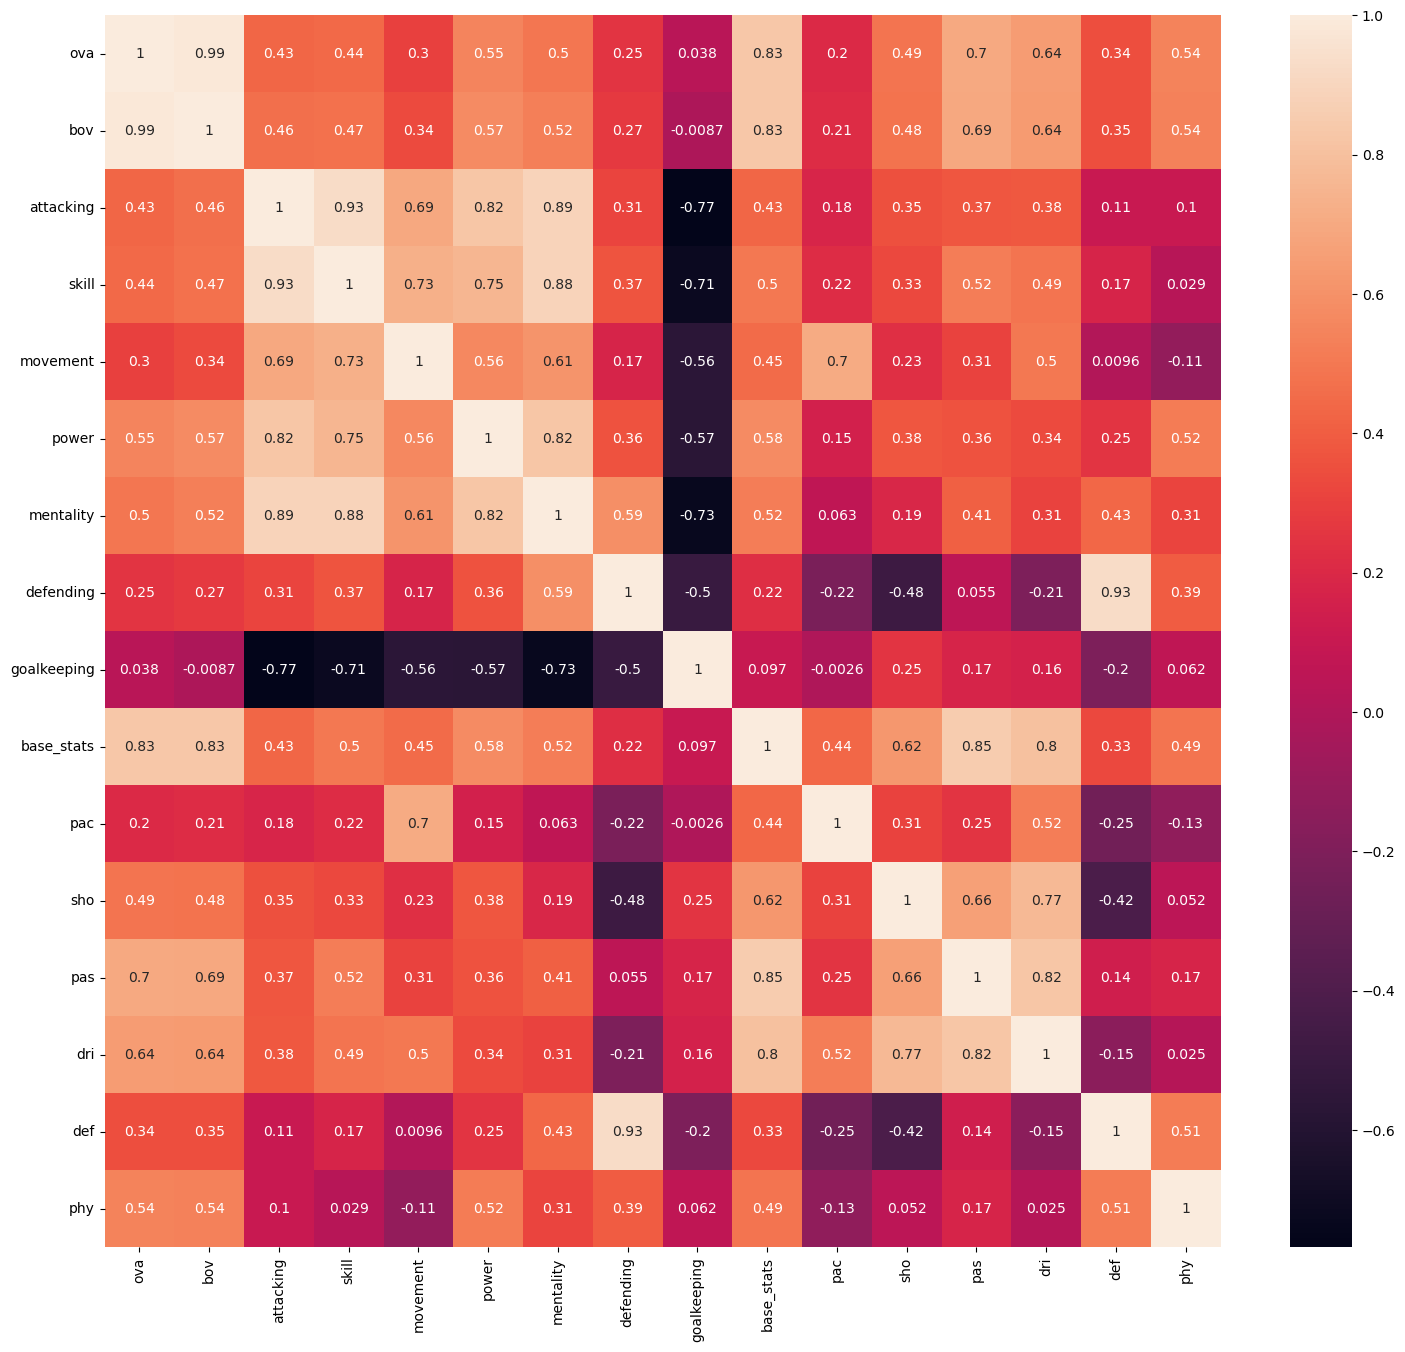

In [34]:
corr_matrix = data.select_dtypes(np.number).corr()
plt.figure(figsize=(18,16))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [35]:
#dropping columns with high multicollinearity
data = data.drop(['bov','def','dri'], axis=1)

In [36]:
data = data.drop(['mentality'], axis=1)

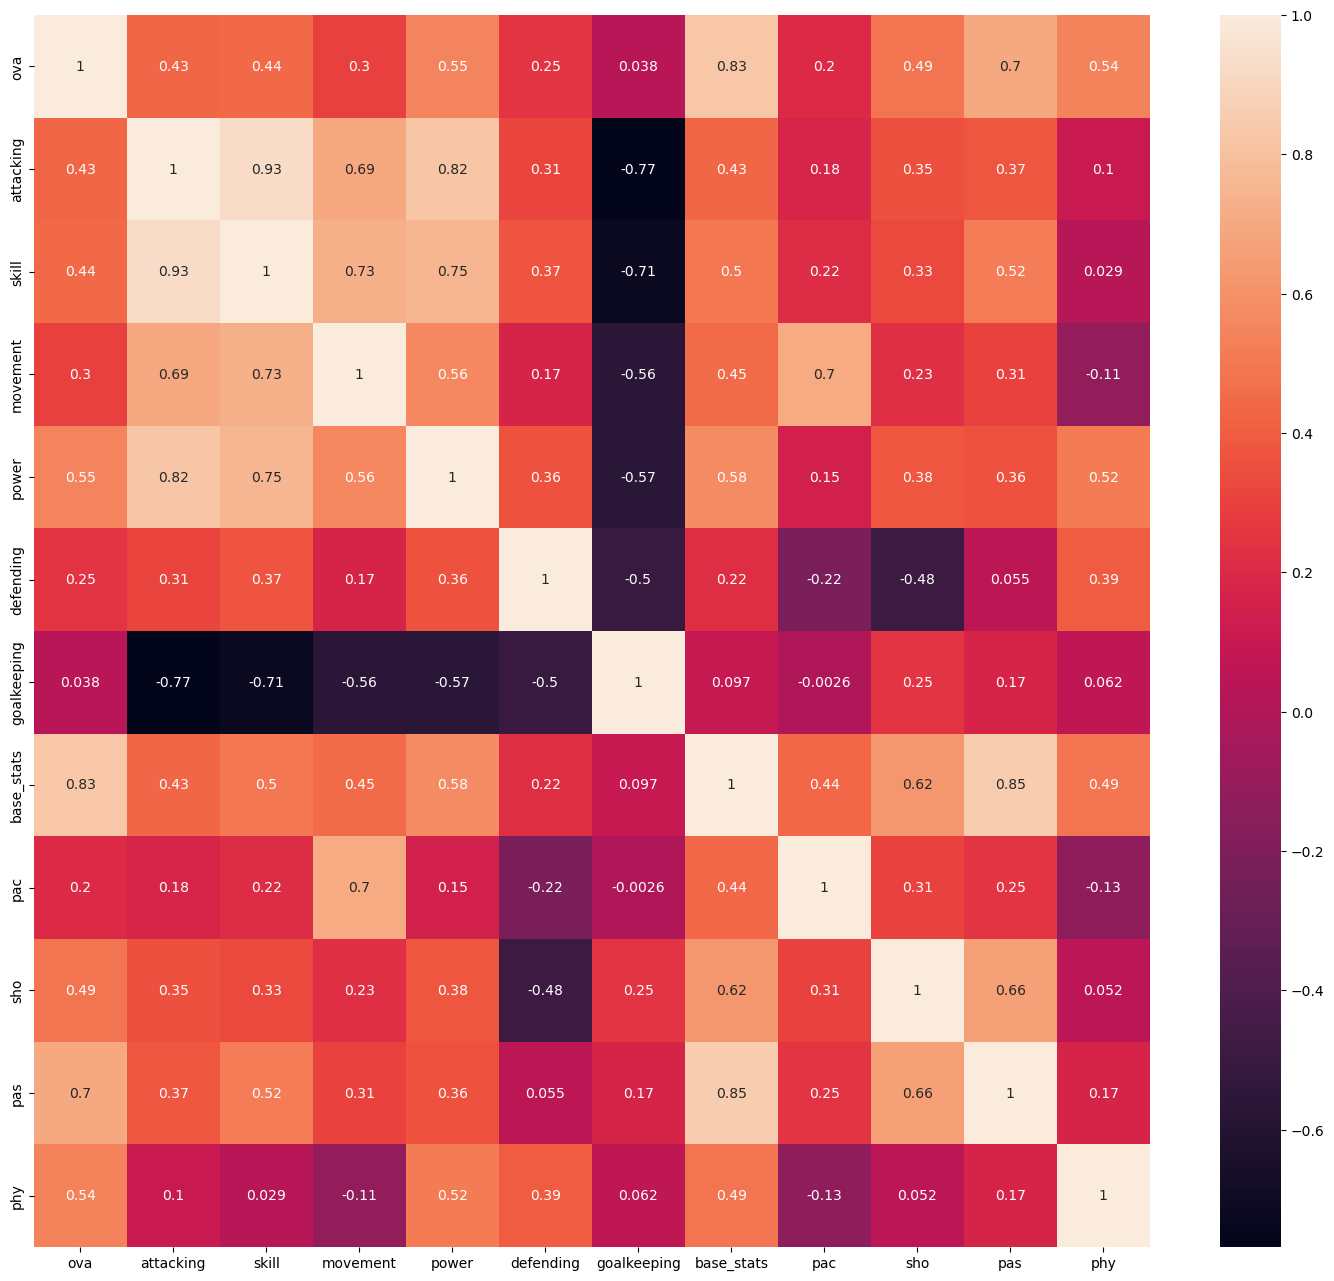

In [37]:
corr_matrix = data.select_dtypes(np.number).corr()
plt.figure(figsize=(18,16))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [38]:
data.shape

(17125, 20)

The categorical columns are:  ['ova', 'attacking', 'skill', 'movement', 'power', 'defending', 'goalkeeping', 'base_stats', 'pac', 'sho', 'pas', 'phy']














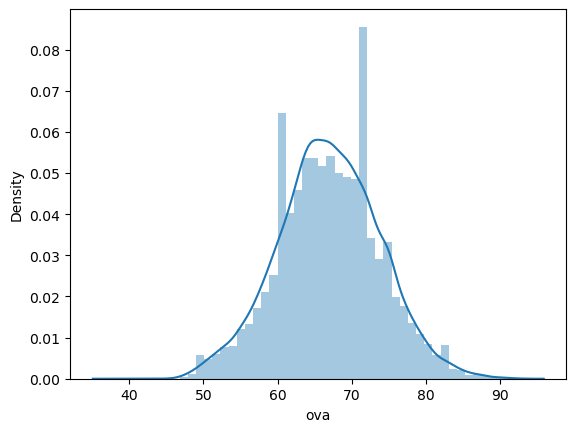

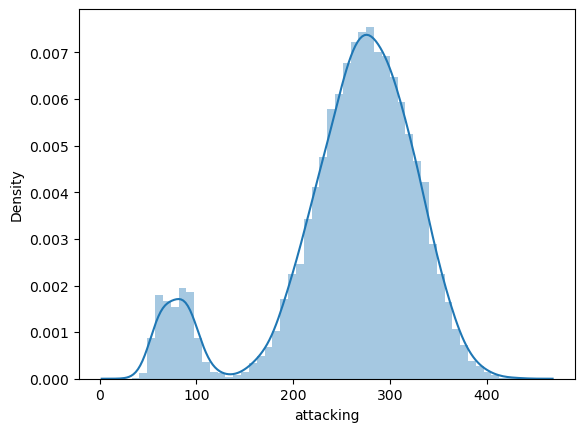

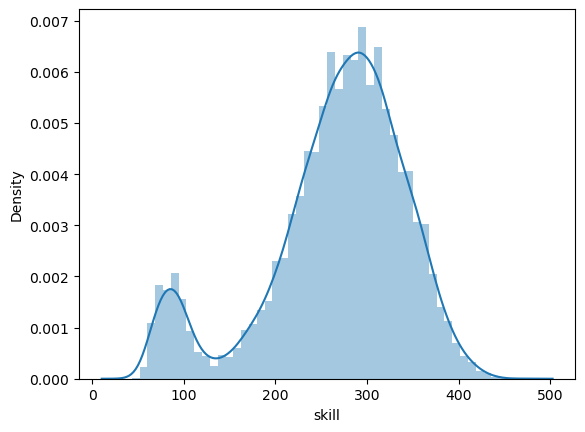

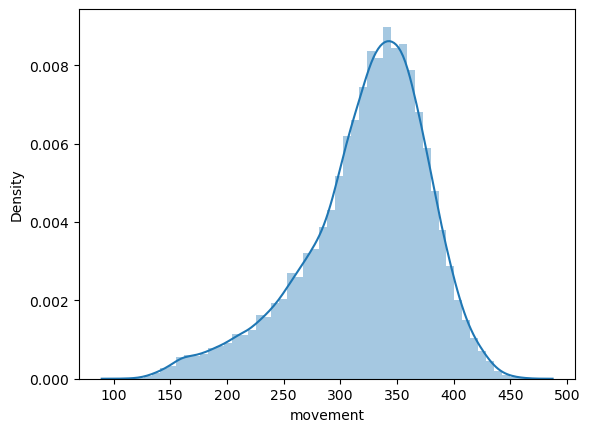

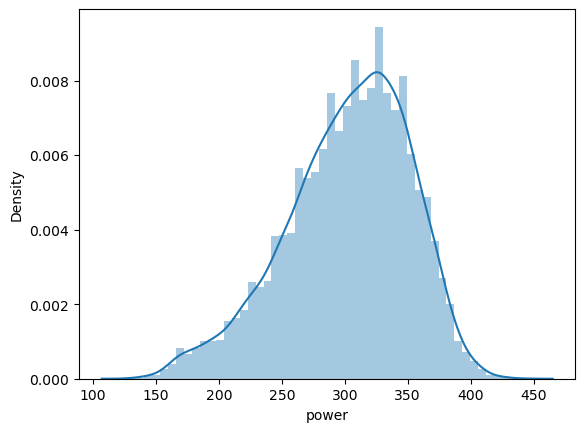

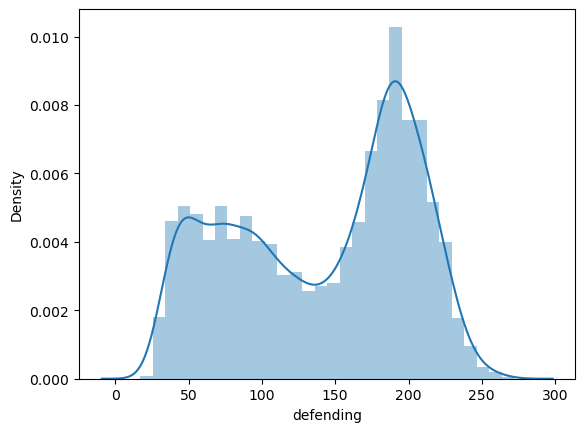

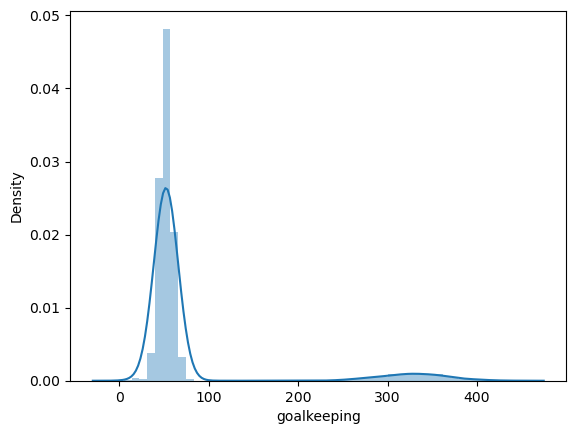

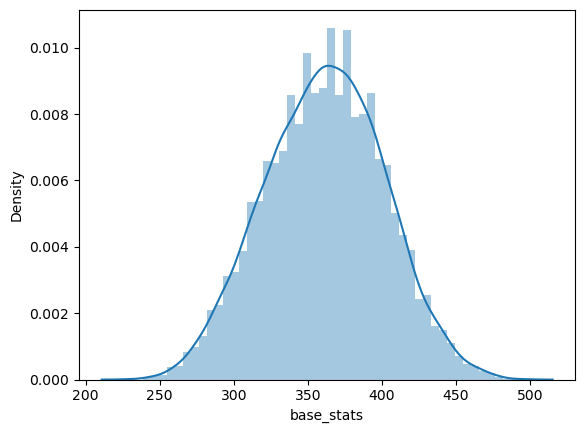

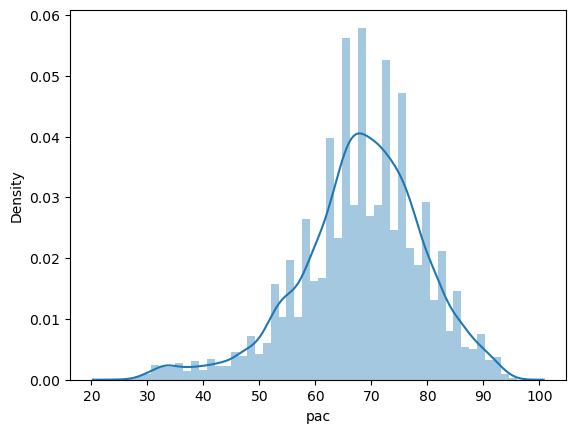

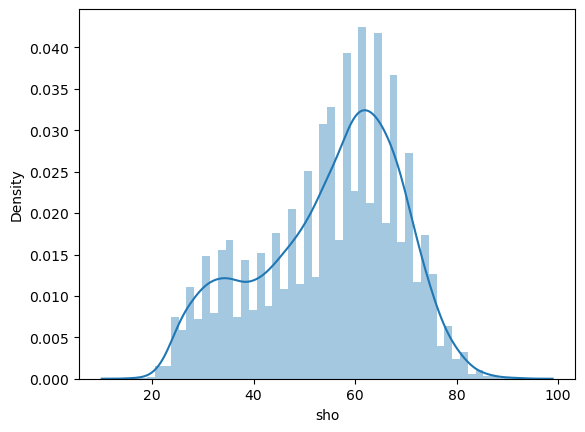

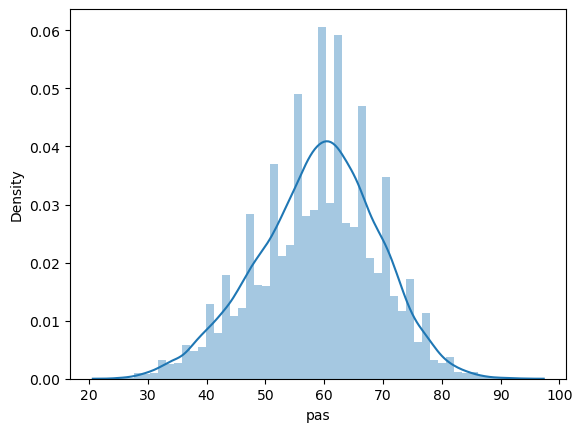

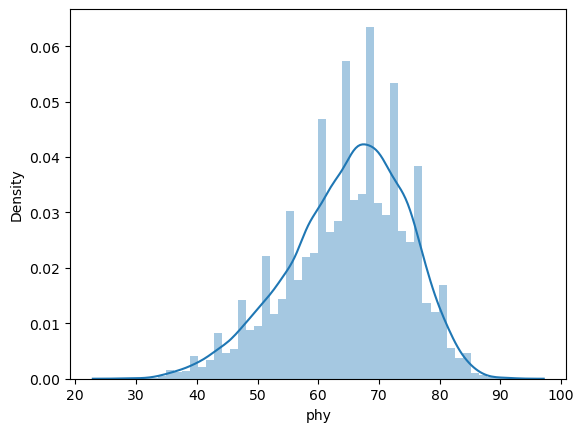

<Figure size 640x480 with 0 Axes>

In [39]:
num_cols = list(data.select_dtypes(np.number).columns)
print("The categorical columns are: ",num_cols)

for col in num_cols:
    sns.distplot(data[col])
    plt.figure()
    print()

In [40]:
def log_clean (x):
    x= np.log(x)
    return x

In [41]:
def sqrt_trans (x):
    x = x**1/3
    return x

In [42]:
data['sho_new']= list(map(log_clean, data['sho']))

In [43]:
data['phy_new'] = list(map(log_clean, data['phy']))
data.head()

,age,ova,bp,height,weight,foot,attacking,skill,movement,power,defending,goalkeeping,base_stats,a/w,d/w,pac,sho,pas,phy,hits_group,sho_new,phy_new
0,33,69,LWB,"6'0""",181lbs,Left,313,338,347,347,208,56,408,Medium,High,71,59,70,69,0-5,4.077537,4.234107
1,37,71,CM,"5'10""",143lbs,Right,337,369,305,324,153,56,385,Medium,Medium,53,69,73,63,0-5,4.234107,4.143135
2,33,71,CAM,"5'9""",161lbs,Right,337,387,295,284,99,51,354,Medium,Low,45,68,76,52,6-14,4.219508,3.951244
3,36,68,ST,"5'11""",165lbs,Right,264,255,176,239,75,68,369,Medium,Low,61,66,66,60,0-5,4.189655,4.094345
4,36,81,CAM,"5'7""",150lbs,Right,367,408,346,297,181,45,420,High,Medium,58,70,85,59,100+,4.248495,4.077537


In [44]:
data['def_new'] = list(map(log_clean, data['defending']))
data.head()

,age,ova,bp,height,weight,foot,attacking,skill,movement,power,defending,goalkeeping,base_stats,a/w,d/w,pac,sho,pas,phy,hits_group,sho_new,phy_new,def_new
0,33,69,LWB,"6'0""",181lbs,Left,313,338,347,347,208,56,408,Medium,High,71,59,70,69,0-5,4.077537,4.234107,5.337538
1,37,71,CM,"5'10""",143lbs,Right,337,369,305,324,153,56,385,Medium,Medium,53,69,73,63,0-5,4.234107,4.143135,5.030438
2,33,71,CAM,"5'9""",161lbs,Right,337,387,295,284,99,51,354,Medium,Low,45,68,76,52,6-14,4.219508,3.951244,4.595120
3,36,68,ST,"5'11""",165lbs,Right,264,255,176,239,75,68,369,Medium,Low,61,66,66,60,0-5,4.189655,4.094345,4.317488
4,36,81,CAM,"5'7""",150lbs,Right,367,408,346,297,181,45,420,High,Medium,58,70,85,59,100+,4.248495,4.077537,5.198497


In [45]:
xt, lmbda = stats.boxcox(data['defending'])

<Axes: xlabel='def_new', ylabel='Density'>

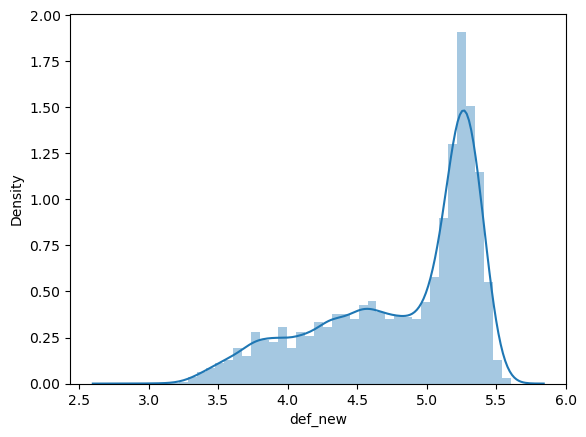

In [46]:
sns.distplot(data['def_new'])

<Axes: xlabel='def_new', ylabel='Density'>

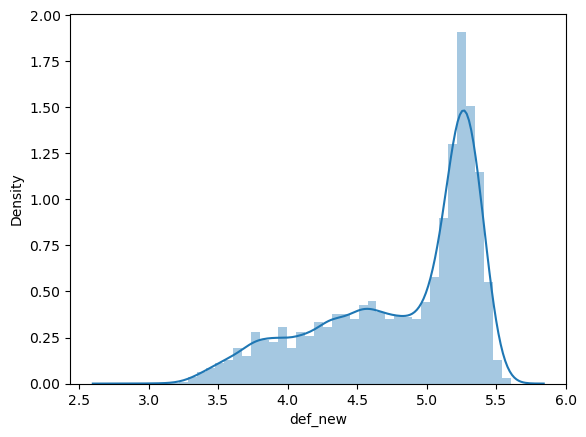

In [47]:
sns.distplot(data['def_new'])

In [48]:
data = data.drop(['goalkeeping', 'sho','defending'], axis=1)

In [49]:
data.shape

(17125, 20)

## Checking/Cleaning and encoding categoricals

In [50]:
data.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         17125 non-null  object
 1   bp          17125 non-null  object
 2   height      17125 non-null  object
 3   weight      17125 non-null  object
 4   foot        17125 non-null  object
 5   a/w         17125 non-null  object
 6   d/w         17125 non-null  object
 7   hits_group  17125 non-null  object
dtypes: object(8)
memory usage: 1.0+ MB


In [51]:
data['height'][0].split('\'')[0]

'6'

In [52]:
data['height'][0].split('\'')[1]

'0"'

In [53]:
(int(data['height'][0].replace('"','').split('\'')[0])*12) + (int(data['height'][0].replace('"','').split('\'')[1]))

72

In [54]:
def clean_height (x):
    return(int(x.replace('"','').split('\'')[0])*12) + (int(x.replace('"','').split('\'')[1]))

In [55]:
data['height_new'] = list(map(clean_height, data['height']))

In [56]:
print(min(data['height_new']))
print(max(data['height_new']))

61
81


In [57]:
def height_group (x):
    if x >=60 and x <= 72:
        return 'b/w 5ft - 6ft'
    if x > 72:
        return 'above 6ft'

In [58]:
data['height_group'] = list(map(height_group, data['height_new']))

In [59]:
data['height_group'].value_counts()

b/w 5ft - 6ft    11364
above 6ft         5761
Name: height_group, dtype: int64

In [60]:
def clean_weight (x):
    x = str(x)
    if x[-1:] == 's':
        return int(x.replace('lbs',''))
    else:
        return int(x)

In [61]:
data["weight_new"] = list(map(clean_weight, data['weight']))

In [62]:
data.head()

,age,ova,bp,height,weight,foot,attacking,skill,movement,power,base_stats,a/w,d/w,pac,pas,phy,hits_group,sho_new,phy_new,def_new,height_new,height_group,weight_new
0,33,69,LWB,"6'0""",181lbs,Left,313,338,347,347,408,Medium,High,71,70,69,0-5,4.077537,4.234107,5.337538,72,b/w 5ft - 6ft,181
1,37,71,CM,"5'10""",143lbs,Right,337,369,305,324,385,Medium,Medium,53,73,63,0-5,4.234107,4.143135,5.030438,70,b/w 5ft - 6ft,143
2,33,71,CAM,"5'9""",161lbs,Right,337,387,295,284,354,Medium,Low,45,76,52,6-14,4.219508,3.951244,4.595120,69,b/w 5ft - 6ft,161
3,36,68,ST,"5'11""",165lbs,Right,264,255,176,239,369,Medium,Low,61,66,60,0-5,4.189655,4.094345,4.317488,71,b/w 5ft - 6ft,165
4,36,81,CAM,"5'7""",150lbs,Right,367,408,346,297,420,High,Medium,58,85,59,100+,4.248495,4.077537,5.198497,67,b/w 5ft - 6ft,150


In [63]:
def group_weight (x):
    if x < 150:
        return '< 150lbs'
    elif x >=150 and x <= 185:
        return '150lbs - 185lbs'
    elif x > 185 and x <= 210:
        return 'more than 186lbs'

In [64]:
data["weight_group"] = list(map(group_weight,data['weight_new']))

In [65]:
data['weight_group'].value_counts()

150lbs - 185lbs     13072
< 150lbs             2321
more than 186lbs     1658
Name: weight_group, dtype: int64

In [66]:
def group_age (x):
    x = int(x)
    if x <= 18 and x <= 29:
        return 'b/w 18 and 29'
    elif x >= 30 and x <= 35:
        return 'b/w 30 and 35'
    else: 
        return '36 +'

In [67]:
data['age_group'] = list(map(group_age, data['age']))

In [68]:
data['age_group'].value_counts()

36 +             12956
b/w 30 and 35     3174
b/w 18 and 29      995
Name: age_group, dtype: int64

In [69]:
data.shape

(17125, 25)

In [70]:
data = data.drop(['age','height','height_new','weight','weight_new'], axis =1)

In [71]:
data['foot'].value_counts(dropna=False)

Right    12906
Left      4219
Name: foot, dtype: int64

Frequency analysis of column:  bp

Frequency analysis of column:  foot

Frequency analysis of column:  a/w

Frequency analysis of column:  d/w

Frequency analysis of column:  hits_group

Frequency analysis of column:  height_group

Frequency analysis of column:  weight_group

Frequency analysis of column:  age_group



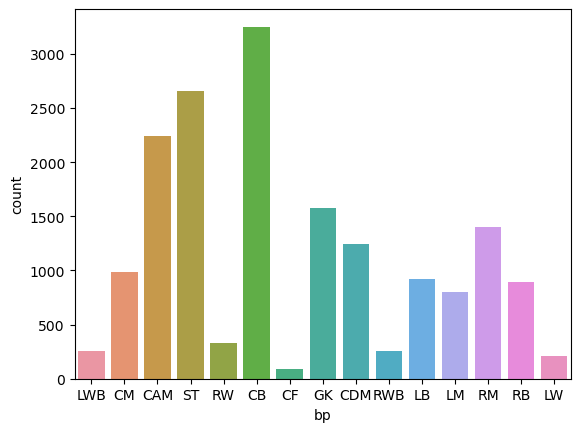

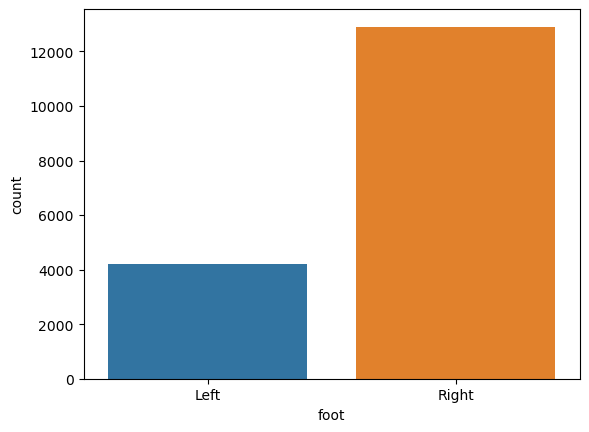

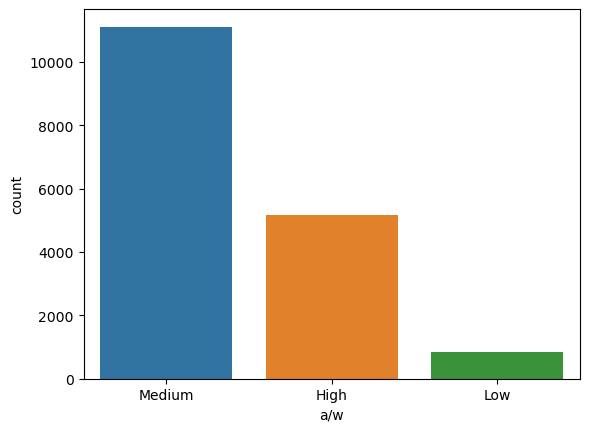

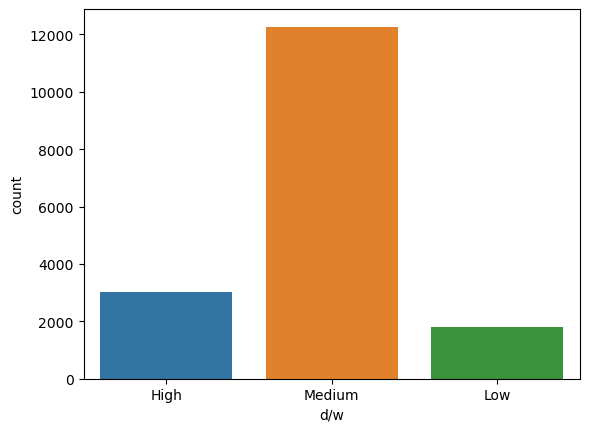

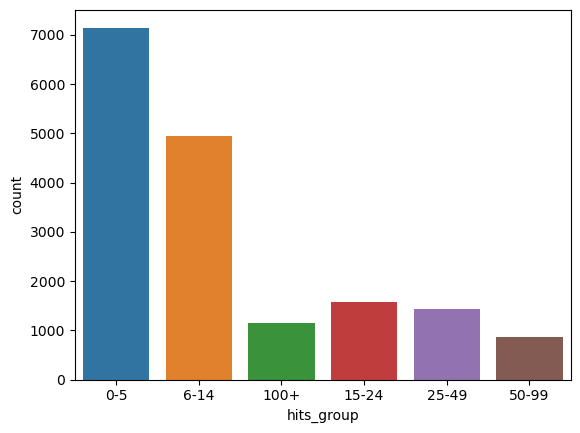

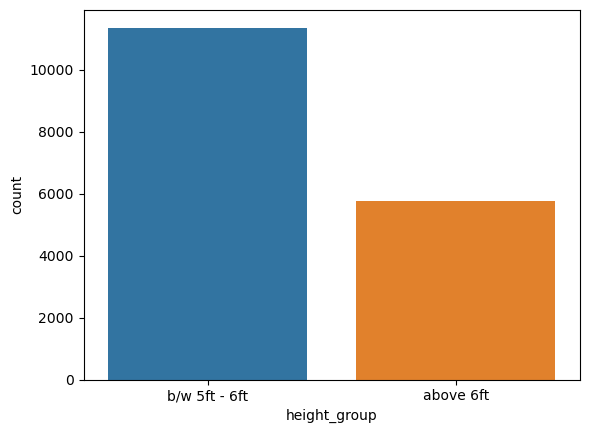

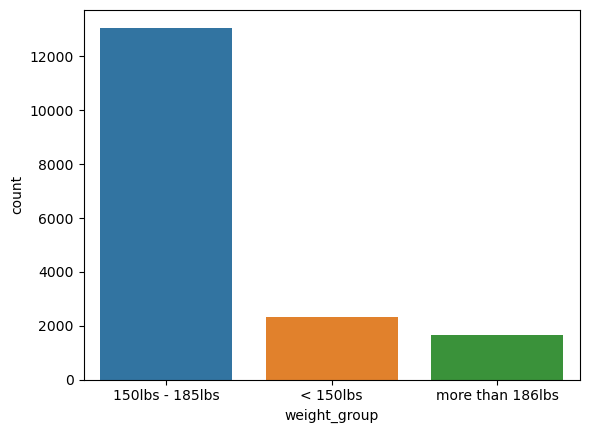

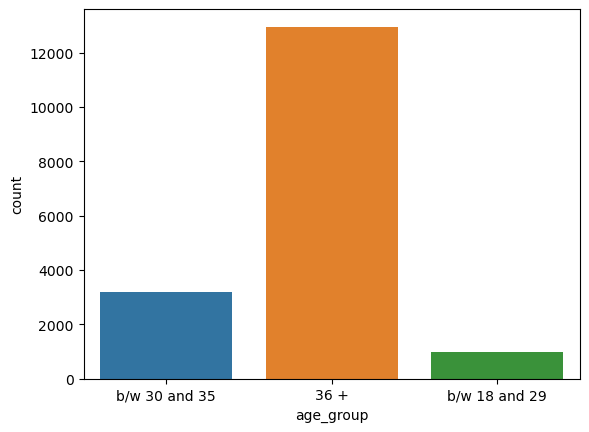

<Figure size 640x480 with 0 Axes>

In [72]:
cols_cat = list(data.select_dtypes(include=['object']).columns)
for col in cols_cat:
    print("Frequency analysis of column: ",col)
    sns.countplot(x=col, data = data)
    plt.figure()
    print()

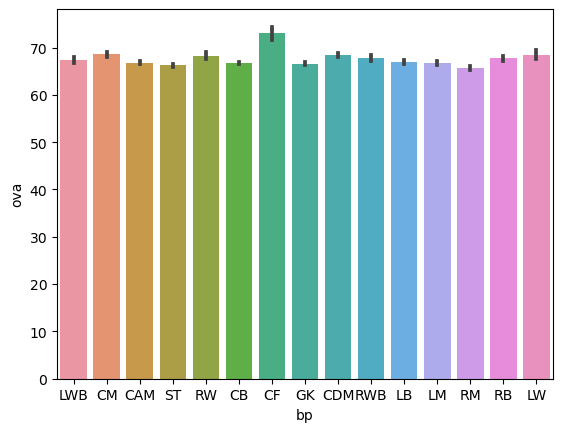

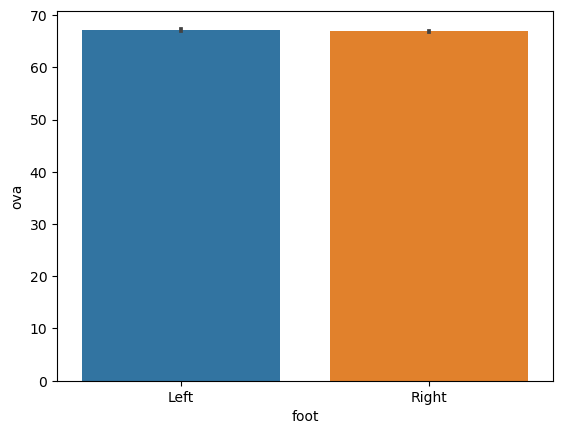

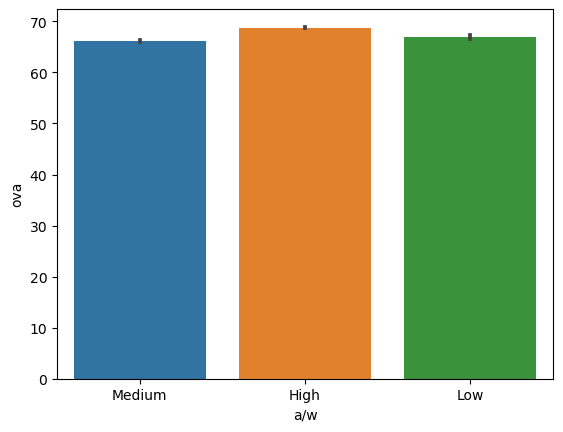

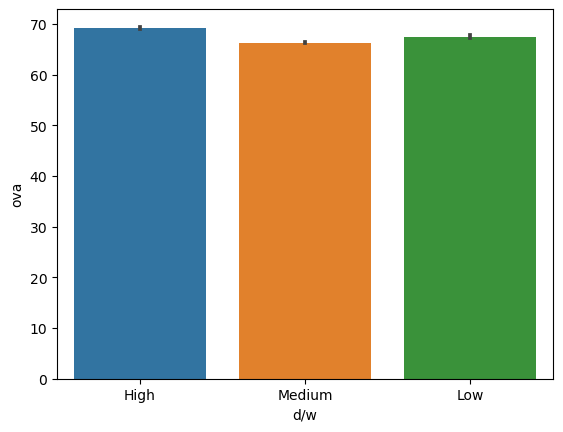

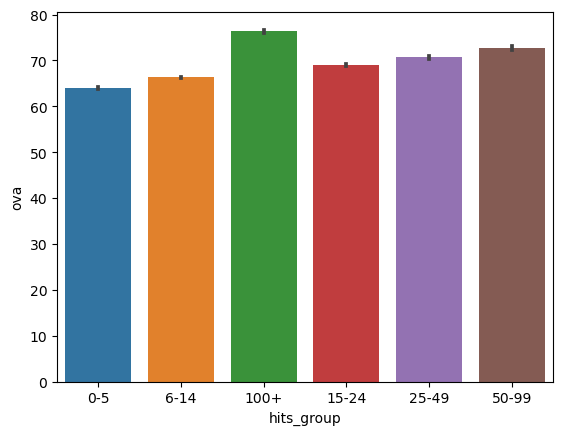

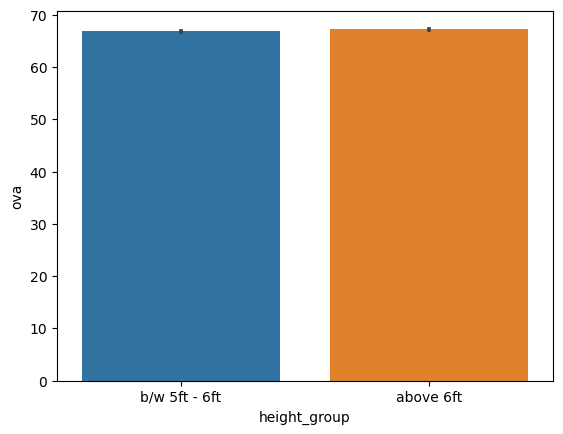

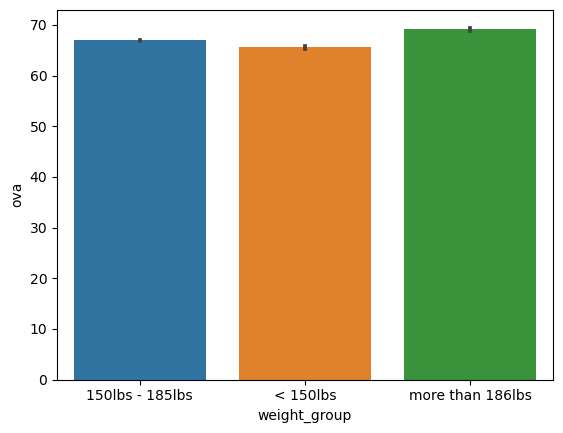

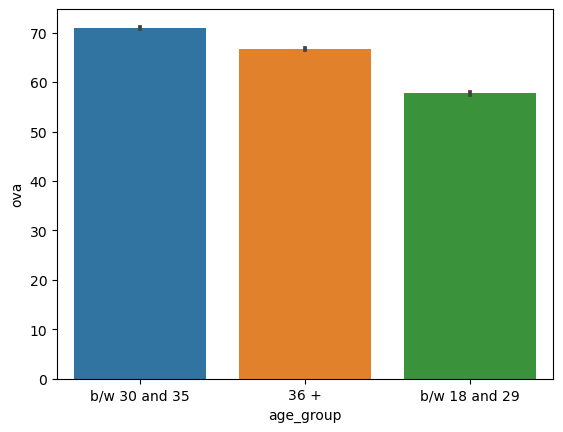

<Figure size 640x480 with 0 Axes>

In [73]:
for col in cols_cat:
    sns.barplot(x=col, y='ova', data = data)
    plt.figure()
    print()

In [104]:
cat_data = data.select_dtypes('object')
categoricals = pd.get_dummies(cat_data, columns=cols_cat, drop_first=True)
#categoricals.head()

In [75]:
encoded = OneHotEncoder(drop='first').fit_transform(cat_data).toarray()
encoded = pd.DataFrame(encoded)

In [177]:
encoded.shape

(17125, 30)

In [76]:
num_data = data.select_dtypes(np.number)
num_data = num_data.drop(['ova'],axis=1)
num_data.head()

,attacking,skill,movement,power,base_stats,pac,pas,phy,sho_new,phy_new,def_new
0,313,338,347,347,408,71,70,69,4.077537,4.234107,5.337538
1,337,369,305,324,385,53,73,63,4.234107,4.143135,5.030438
2,337,387,295,284,354,45,76,52,4.219508,3.951244,4.595120
3,264,255,176,239,369,61,66,60,4.189655,4.094345,4.317488
4,367,408,346,297,420,58,85,59,4.248495,4.077537,5.198497


In [77]:
minmax = MinMaxScaler().fit_transform(num_data)
minmax = pd.DataFrame(minmax).reset_index(drop=True)
minmax.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.693069,0.690867,0.666667,0.693038,0.666667,0.647887,0.661765,0.636364,0.741444,0.758650,0.903244
1,0.752475,0.763466,0.547009,0.620253,0.581481,0.394366,0.705882,0.545455,0.830403,0.685093,0.792481
2,0.752475,0.805621,0.518519,0.493671,0.466667,0.281690,0.750000,0.378788,0.822108,0.529937,0.635473
3,0.571782,0.496487,0.179487,0.351266,0.522222,0.507042,0.602941,0.500000,0.805146,0.645643,0.535339
4,0.826733,0.854801,0.663818,0.534810,0.711111,0.464789,0.882353,0.484848,0.838578,0.632054,0.853096


In [78]:
st_scaled = StandardScaler().fit_transform(num_data)
st_scaled = pd.DataFrame(st_scaled).reset_index(drop=True)
st_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.753765,0.929503,0.442481,0.902916,1.158424,0.260916,1.087080,0.423322,0.376847,0.460358,0.927854
1,1.085929,1.333111,-0.322101,0.437133,0.587011,-1.353898,1.381589,-0.197797,0.920723,-0.112382,0.374376
2,1.085929,1.567465,-0.504145,-0.372926,-0.183154,-2.071594,1.676098,-1.336516,0.870011,-1.320490,-0.410185
3,0.075598,-0.151127,-2.670460,-1.284242,0.189507,-0.636203,0.694400,-0.508357,0.766310,-0.419556,-0.910553
4,1.501133,1.840877,0.424276,-0.109657,1.456552,-0.905339,2.559627,-0.611877,0.970705,-0.525370,0.677264


In [79]:
norm_scaled = Normalizer().fit_transform(num_data)
norm_scaled = pd.DataFrame(norm_scaled).reset_index(drop=True)
norm_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.393016,0.424407,0.435708,0.435708,0.512303,0.089151,0.087895,0.086639,0.005120,0.005317,0.006702
1,0.432150,0.473184,0.391115,0.415479,0.493702,0.067964,0.093611,0.080788,0.005430,0.005313,0.006451
2,0.447588,0.513996,0.391806,0.377196,0.470167,0.059767,0.100940,0.069064,0.005604,0.005248,0.006103
3,0.433598,0.418816,0.289065,0.392538,0.606052,0.100187,0.108400,0.098545,0.006881,0.006725,0.007091
4,0.438771,0.487789,0.413664,0.355082,0.502136,0.069343,0.101623,0.070538,0.005079,0.004875,0.006215


In [168]:
y = data['ova']
X = pd.concat([st_scaled, encoded], axis=1)
#X = pd.concat([num_data, categoricals], axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.753765,0.929503,0.442481,0.902916,1.158424,0.260916,1.087080,0.423322,0.376847,0.460358,0.927854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.085929,1.333111,-0.322101,0.437133,0.587011,-1.353898,1.381589,-0.197797,0.920723,-0.112382,0.374376,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1.085929,1.567465,-0.504145,-0.372926,-0.183154,-2.071594,1.676098,-1.336516,0.870011,-1.320490,-0.410185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.075598,-0.151127,-2.670460,-1.284242,0.189507,-0.636203,0.694400,-0.508357,0.766310,-0.419556,-0.910553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.501133,1.840877,0.424276,-0.109657,1.456552,-0.905339,2.559627,-0.611877,0.970705,-0.525370,0.677264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=.35, random_state=10)

In [170]:
X_train.shape, y_train.shape

((11131, 41), (11131,))

In [171]:
X_test.shape, y_test.shape

((5994, 41), (5994,))

In [172]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [173]:
lm.score(X_test,y_test)

0.8622035525791301

In [174]:
predictions = lm.predict(X_test)

In [175]:
mse = mean_squared_error(y_test ,  predictions)
mse

6.413813554044138

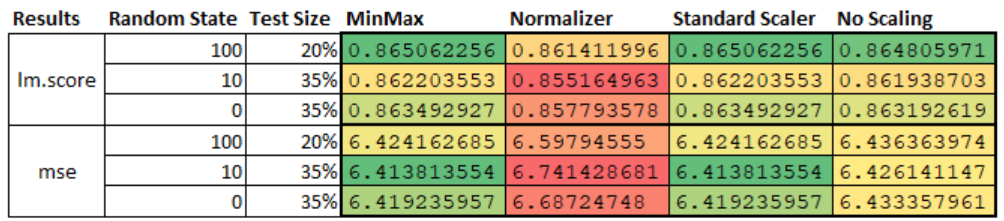

In [178]:
r2_score(y_test, predictions)

0.8622035525791301